In [588]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [589]:
import pickle

def loadDataPickle(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [590]:
pickle = loadDataPickle('WikipediaMovieDataset.pickle')
movies = pd.DataFrame(pickle)
movies.head()

,Title,Directed by,Produced by,Cinematography,Runtime,Distributed by,Language,Written by,Cast,Edited by,Production companies,Release Day,Release Month,Release Year,Age Rating,SentimentScore,Budget,Box Office,Box Office Status
0,Daybreakers,[The Spierig Brothers],"[Chris Brown, Sean Furst, Bryan Furst]",[Ben Nott],98,"[Lionsgate (United States), Hoyts Distribution...",English,[The Spierig Brothers],"[Ethan Hawke, Willem Dafoe, Claudia Karvan, Mi...",[Matt Villa],"[Lionsgate, Screen Australia, Pictures in Para...",11,9,2009,R,0.642857,20000000,51400000,Success
1,Leap Year,[Anand Tucker],"[Gary Barber, Chris Bender, Roger Birnbaum, Jo...",[Newton Thomas Sigel],100,"[Universal Pictures (United States), Optimum R...",English,"[Harry Elfont, Deborah Kaplan]","[Amy Adams, Matthew Goode, Adam Scott, John Li...",[Nick Moore],"[Spyglass Entertainment, BenderSpink]",6,1,2010,PG,0.830000,19000000,32700000,Failure
2,Youth in Revolt,[Miguel Arteta],[David Permut],[Chuy Chávez],89,[Dimension Films],English,[Gustin Nash],"[Michael Cera, Portia Doubleday, Jean Smart, M...","[Pamela Martin, Andy Keir]","[Permut, Shangri-La Entertainment]",19,10,2009,R,0.780000,18000000,19700000,Failure
3,The Book of Eli,[The Hughes Brothers],"[Joel Silver, Denzel Washington, Broderick Joh...",[Don Burgess],118,"[Warner Bros. Pictures, (North America), Summ...",English,[Gary Whitta],"[Denzel Washington, Gary Oldman, Mila Kunis, R...",[Cindy Mollo],"[Alcon Entertainment, Silver Pictures]",15,1,2010,R,0.880000,80000000,157100000,Failure
4,The Spy Next Door,[Brian Levant],[Robert Simonds],[Dean Cundey],94,"[Lionsgate, (United States), Mandate Pictures...",English,"[Jonathan Bernstein, James Greer, Gregory Poir...","[Jackie Chan, Amber Valletta, Madeline Carroll...",[Lawrence Jordan],[Relativity Media],22,12,2009,PG,0.580000,28000000,45200000,Failure


In [591]:
cinema = movies.loc[0, 'Cinematography']
print(cinema[0])

Ben Nott


In [592]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 1761 non-null   object 
 1   Directed by           1761 non-null   object 
 2   Produced by           1761 non-null   object 
 3   Cinematography        1761 non-null   object 
 4   Runtime               1761 non-null   int64  
 5   Distributed by        1761 non-null   object 
 6   Language              1761 non-null   object 
 7   Written by            1761 non-null   object 
 8   Cast                  1761 non-null   object 
 9   Edited by             1761 non-null   object 
 10  Production companies  1761 non-null   object 
 11  Release Day           1761 non-null   int32  
 12  Release Month         1761 non-null   int32  
 13  Release Year          1761 non-null   int64  
 14  Age Rating            1761 non-null   object 
 15  SentimentScore       

In [593]:
numRows = movies.shape[0]
print(numRows)

1761


In [594]:
highestBudget = movies['Budget'].max()
lowestBudget = movies['Budget'].min()

print("Highest Budget:", highestBudget)
print("Lowest Budget:", lowestBudget)

Highest Budget: 447000000
Lowest Budget: 50000


In [595]:
highestBoxOffice = movies['Box Office'].max()
lowestBoxOffice = movies['Box Office'].min()

print(f"Highest Box Office: {highestBoxOffice}")
print(f"Lowest Box Office: {lowestBoxOffice}")

Highest Box Office: 2923000000
Lowest Box Office: 15071


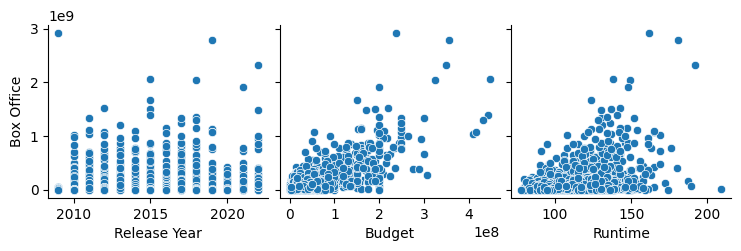

In [596]:
sb.pairplot(movies, y_vars=['Box Office'], x_vars=['Release Year', 'Budget', 'Runtime'])

In [597]:
# movies = movies[movies['Budget'] <= 100000000] # 100 million
# movies = movies[movies['Box Office'] <= 1500000000] # 1.5 billion

In [598]:
movies.shape[0]

1761

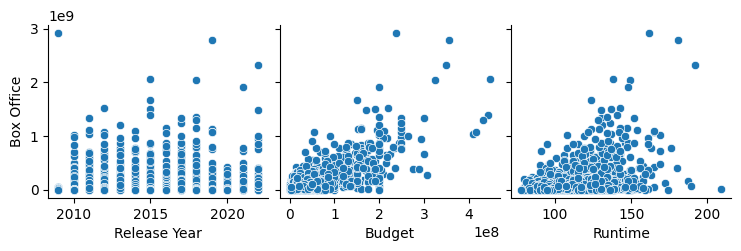

In [599]:
sb.pairplot(movies, y_vars=['Box Office'], x_vars=['Release Year', 'Budget', 'Runtime'])

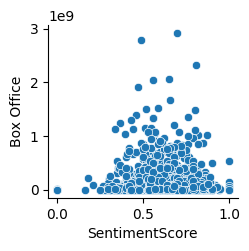

In [600]:
sb.pairplot(movies, y_vars=['Box Office'], x_vars= 'SentimentScore')

In [601]:
corrBudBox = movies['Budget'].corr(movies['Box Office'])
corrRunBox = movies['Runtime'].corr(movies['Box Office'])
corrSentiBox = movies['SentimentScore'].corr(movies['Box Office'])

print("Correlation Between Budget and Box Office:", corrBudBox)
print("Correlation Between Runtime and Box Office:", corrRunBox)
print("Correlation Between SentimentScore and Box Office:", corrSentiBox)

Correlation Between Budget and Box Office: 0.7749257709753234
Correlation Between Runtime and Box Office: 0.42377339921730034
Correlation Between SentimentScore and Box Office: -0.01422998458585873


In [602]:
summaryStats = movies[['Runtime', 'SentimentScore', 'Budget', 'Box Office']].describe()
print(summaryStats)

           Runtime  SentimentScore        Budget    Box Office
count  1761.000000     1761.000000  1.761000e+03  1.761000e+03
mean    110.785349        0.631376  4.458517e+07  1.344263e+08
std      17.566867        0.145385  5.734977e+07  2.498002e+08
min      78.000000        0.000000  5.000000e+04  1.507100e+04
25%      98.000000        0.534483  1.000000e+07  1.130000e+07
50%     108.000000        0.640000  2.500000e+07  4.860000e+07
75%     121.000000        0.730000  5.000000e+07  1.420000e+08
max     209.000000        1.000000  4.470000e+08  2.923000e+09


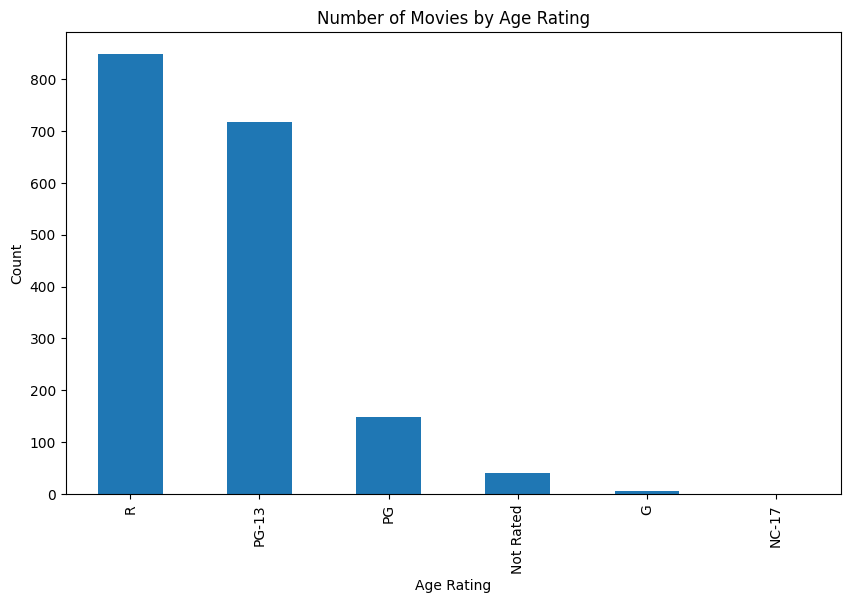

In [603]:
# Count the Number of Movies for Each Language
language_counts = movies['Age Rating'].value_counts()

# Plot the Bar Chart
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Number of Movies by Age Rating')
plt.xlabel('Age Rating')
plt.ylabel('Count')
plt.show()

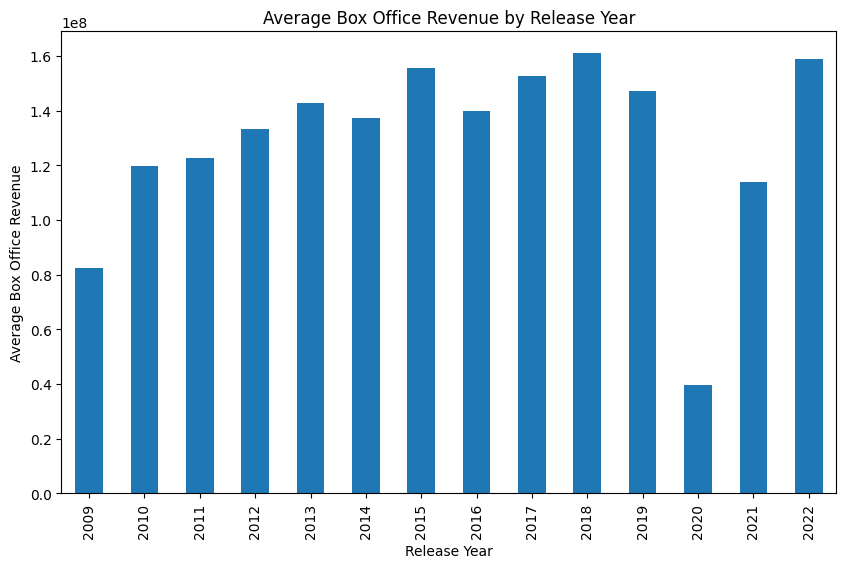

In [604]:
# Group Movies by Release Year and Calculate the Mean Box Office Revenue
yearlyBoxOffice = movies.groupby('Release Year')['Box Office'].mean()

# Plot the Box Office Revenue by Release Year
plt.figure(figsize=(10, 6))
yearlyBoxOffice.plot(kind='bar')
plt.title('Average Box Office Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Box Office Revenue')
plt.show()

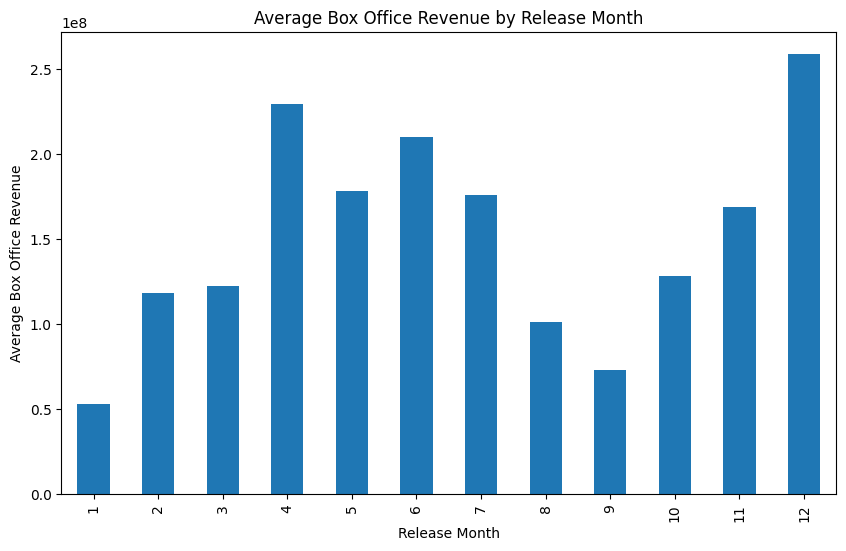

In [605]:
# Group Movies by Release Month and Calculate the Mean Box Office Revenue
monthlyBoxOffice = movies.groupby('Release Month')['Box Office'].mean()

# Plot the Box Office Revenue by Release Month
plt.figure(figsize=(10, 6))
monthlyBoxOffice.plot(kind='bar')
plt.title('Average Box Office Revenue by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Box Office Revenue')
plt.show()

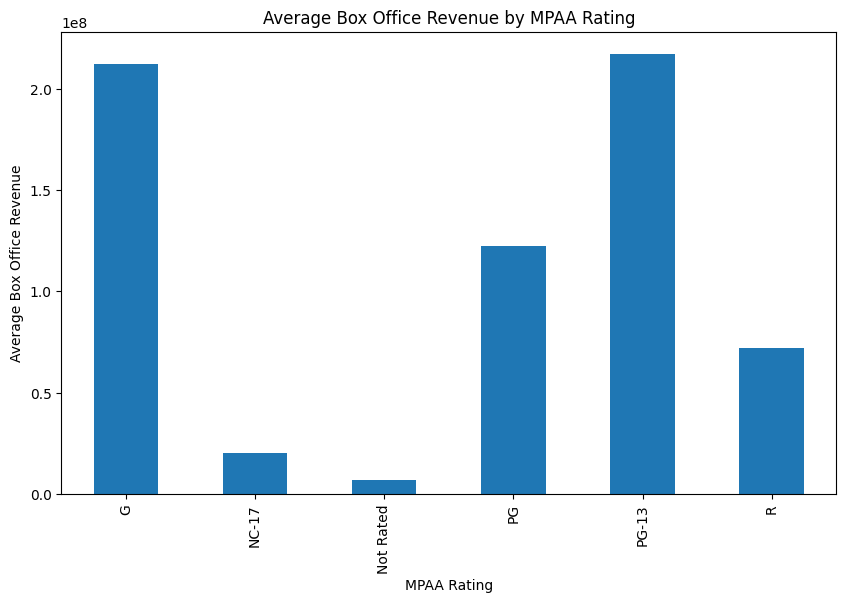

In [606]:
# Group Movies by Rating and Calculate the Mean Box Office Revenue
ratingBoxOffice = movies.groupby('Age Rating')['Box Office'].mean()

# Plot the Box Office Revenue by Release Month
plt.figure(figsize=(10, 6))
ratingBoxOffice.plot(kind='bar')
plt.title('Average Box Office Revenue by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Average Box Office Revenue')
plt.show()

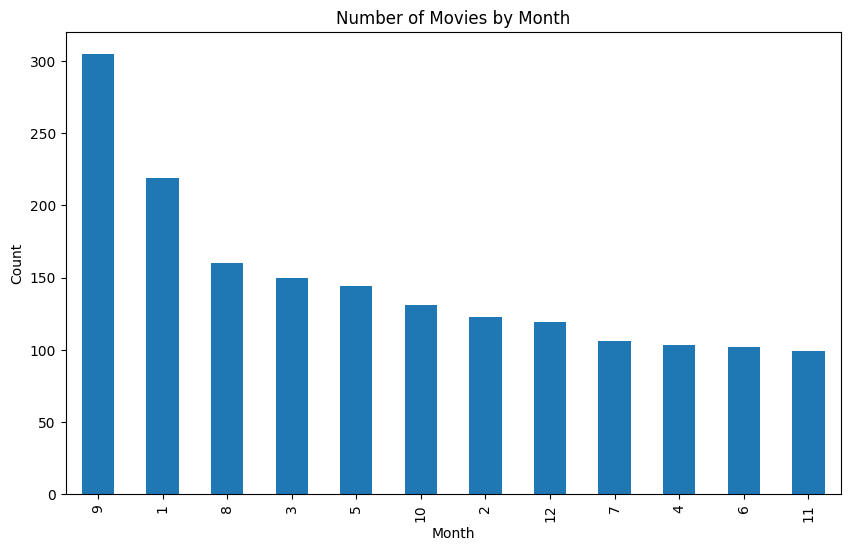

In [607]:
# Can Help To See Which Months Most Movies Are Released
monthCounts = movies['Release Month'].value_counts()

plt.figure(figsize=(10, 6))
monthCounts.plot(kind='bar')
plt.title('Number of Movies by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

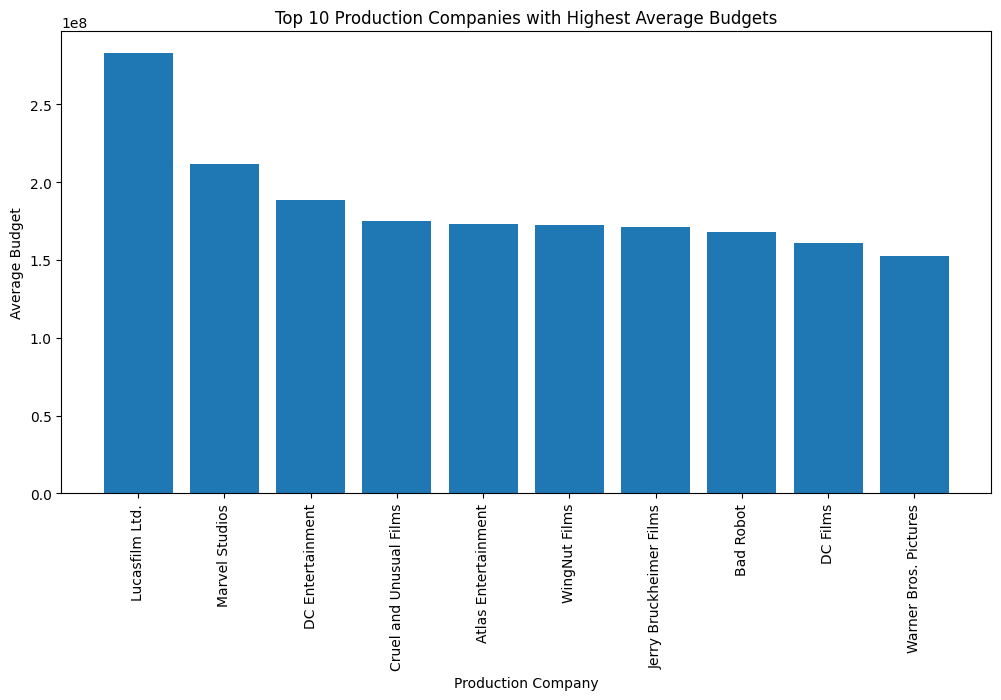

In [608]:
# Flatten The List Of Lists
allCompanies = [company for sublist in movies['Production companies'] for company in sublist]

# Get Unique Companies
productionCompanies = list(set(allCompanies))

# Set A Threshold For The Minimum Number Of Movies
threshold = 5

# Calculate Average Budgets For Each Production Company
averageBudgets = {company: movies[movies['Production companies'].apply(lambda x: company in x)]['Budget'].mean() 
                    for company in productionCompanies 
                    if allCompanies.count(company) >= threshold}

# Sort The Dictionary By Value In Descending Order And Get The Top 10
top10Companies = sorted(averageBudgets.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract The Company Names And Their Corresponding Budgets
companies, budgets = zip(*top10Companies)

# Plot The Data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Production Companies with Highest Average Budgets')
plt.xlabel('Production Company')
plt.ylabel('Average Budget')
plt.bar(companies, budgets)
plt.show()

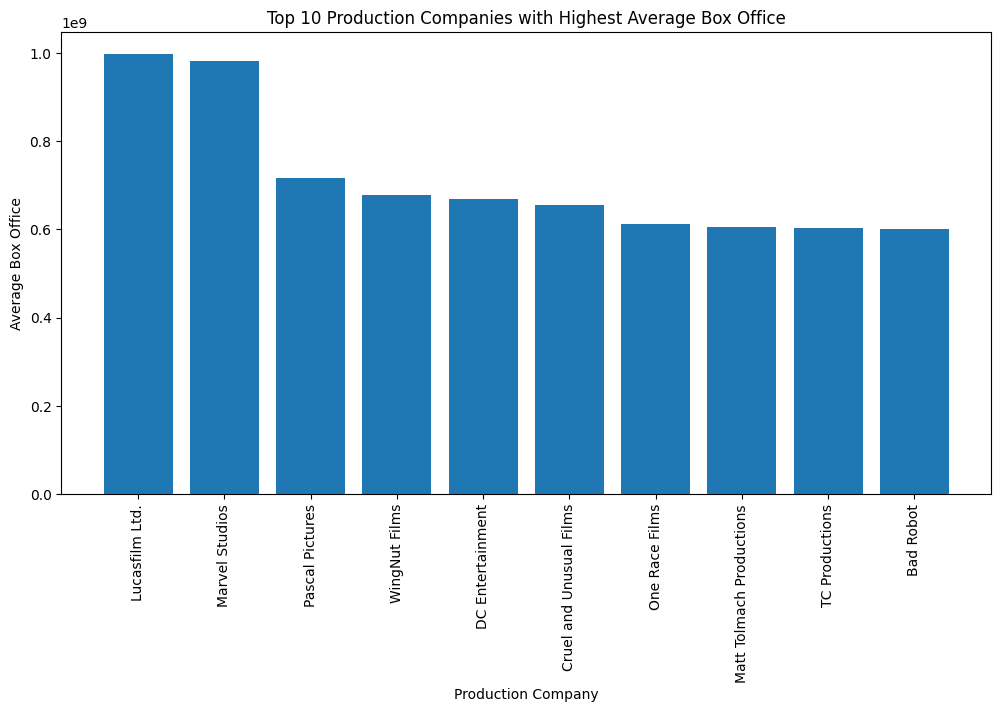

In [609]:
# Flatten The List Of Lists
allCompanies = [company for sublist in movies['Production companies'] for company in sublist]

# Get Unique Companies
productionCompanies = list(set(allCompanies))

# Set A Threshold For The Minimum Number Of Movies
threshold = 5

# Calculate Average Budgets For Each Production Company
averageBudgets = {company: movies[movies['Production companies'].apply(lambda x: company in x)]['Box Office'].mean() 
                    for company in productionCompanies 
                    if allCompanies.count(company) >= threshold}

# Sort The Dictionary By Value In Descending Order And Get The Top 10
top10Companies = sorted(averageBudgets.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract The Company Names And Their Corresponding Budgets
companies, budgets = zip(*top10Companies)

# Plot The Data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Production Companies with Highest Average Box Office')
plt.xlabel('Production Company')
plt.ylabel('Average Box Office')
plt.bar(companies, budgets)
plt.show()

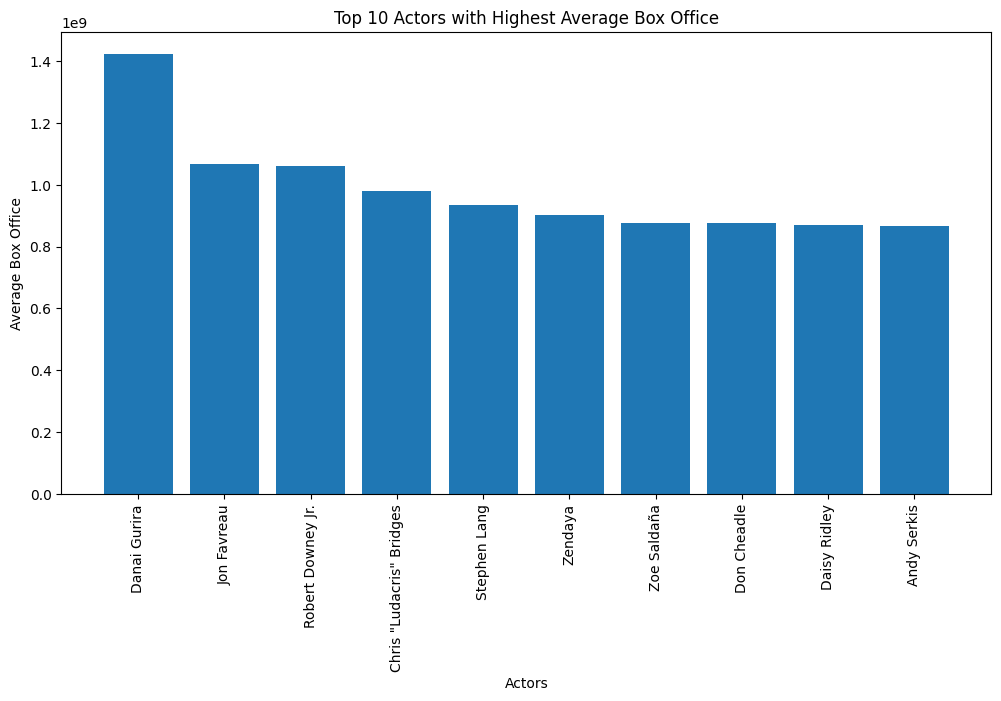

In [610]:
# Flatten The List Of Lists
allActors = [actor for sublist in movies['Cast'] for actor in sublist]

# Get Unique Actors
actors = list(set(allActors))
# print(actors.index('Screen Australia'))

# Set A Threshold For The Minimum Number Of Movies
threshold = 5

# Calculate Average Budgets For Each Production Company
averageBoxOfficeActor = {actor: movies[movies['Cast'].apply(lambda x: actor in x)]['Box Office'].mean() for actor in actors 
                            if allActors.count(actor) >= threshold}

# Sort the dictionary by value in descending order and get the top 10
top10Actors = sorted(averageBoxOfficeActor.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the company names and their corresponding budgets
actors, boxOffice = zip(*top10Actors)

# Plot the data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Actors with Highest Average Box Office')
plt.xlabel('Actors')
plt.ylabel('Average Box Office')
plt.bar(actors, boxOffice)
plt.show()

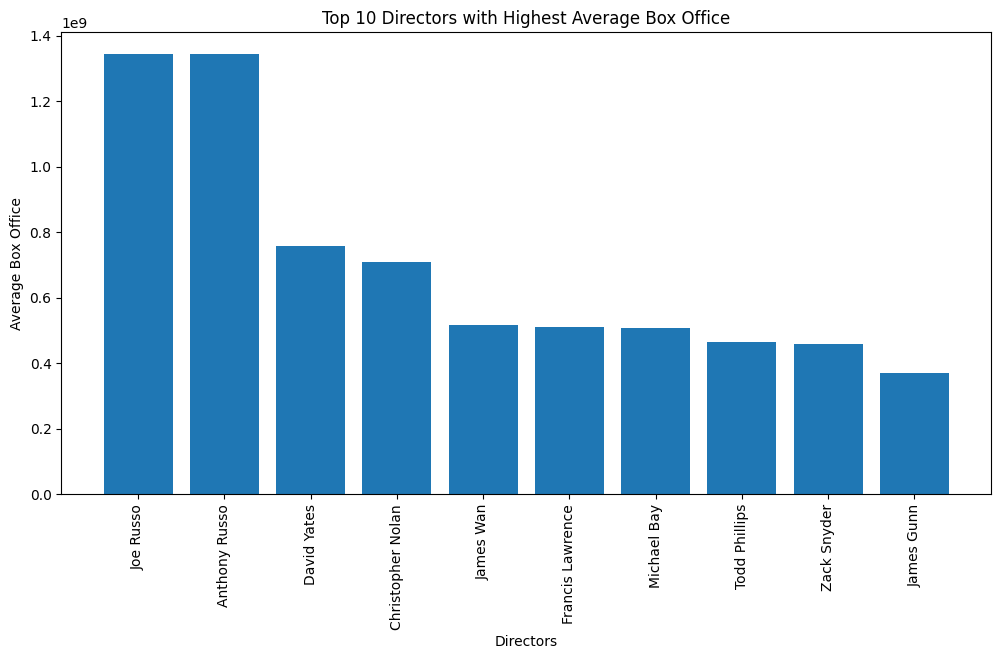

In [611]:
# Flatten The List Of Lists
allDirectors = [director for sublist in movies['Directed by'] for director in sublist]

# Get Unique Directors
directors = list(set(allDirectors))

# Set A Threshold For The Minimum Number Of Movies
threshold = 5

# Calculate Average Budgets For Each Director
averageBoxOfficeDirector = {director: movies[movies['Directed by'].apply(lambda x: director in x)]['Box Office'].mean() for director in directors 
                            if allDirectors.count(director) >= threshold}

# Sort the dictionary by value in descending order and get the top 10
top10Directors = sorted(averageBoxOfficeDirector.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the Director names and their corresponding budgets
directors, boxOffice = zip(*top10Directors)

# Plot the data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Directors with Highest Average Box Office')
plt.xlabel('Directors')
plt.ylabel('Average Box Office')
plt.bar(directors, boxOffice)
plt.show()